<a href="https://www.kaggle.com/code/rakeshrk07/eda-population-dataset-using-plotly?scriptVersionId=158669099" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-population-dataset/world_country_stats.csv
/kaggle/input/world-population-dataset/world_population_by_country_2023.csv
/kaggle/input/world-population-dataset/world_population_by_year_1950_2023.csv


In [2]:
countries_df=pd.read_csv('/kaggle/input/world-population-dataset/world_country_stats.csv')
population_df=pd.read_csv('/kaggle/input/world-population-dataset/world_population_by_country_2023.csv')
population_by_year=pd.read_csv('/kaggle/input/world-population-dataset/world_population_by_year_1950_2023.csv')

In [3]:
countries_df.sample(2)

,country,region,land_area,fertility_rate,median_age
109,Kuwait,Asia,17820,2.1,40.0
31,Burkina Faso,Africa,273600,4.6,17.0


In [4]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         234 non-null    object 
 1   region          234 non-null    object 
 2   land_area       234 non-null    int64  
 3   fertility_rate  233 non-null    float64
 4   median_age      233 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 9.3+ KB


In [5]:
countries_df.describe()

,land_area,fertility_rate,median_age
count,2.340000e+02,233.000000,233.000000
mean,5.559568e+05,2.414163,31.309013
std,1.691024e+06,1.155913,9.628386
min,0.000000e+00,0.800000,15.000000
25%,2.650000e+03,1.600000,22.000000
50%,7.972000e+04,2.000000,32.000000
75%,4.070800e+05,3.000000,40.000000
max,1.637687e+07,6.700000,54.000000


In [6]:
countries_df.isnull().sum()

country           0
region            0
land_area         0
fertility_rate    1
median_age        1
dtype: int64

In [7]:
countries_df

,country,region,land_area,fertility_rate,median_age
0,Afghanistan,Asia,652860,4.4,17.0
1,Albania,Europe,27400,1.4,38.0
2,Algeria,Africa,2381740,2.8,28.0
3,American Samoa,Oceania,200,2.2,29.0
4,Andorra,Europe,470,1.1,43.0
...,...,...,...,...,...
229,Wallis & Futuna,Oceania,140,1.9,37.0
230,Western Sahara,Africa,266000,2.2,32.0
231,Yemen,Asia,527970,3.6,19.0
232,Zambia,Africa,743390,4.2,17.0


> **I will use plotly for most of the plots .**

> **Plotly is a data visualization library that allows users to create interactive and dynamic plots in Python, R, and Julia. It provides a high-level interface for creating a wide variety of charts and graphs, including line charts, bar charts, scatter plots, heatmaps, and more.**

> **You can interact with the plot by using the tools shown in top right corner of each plot**

In [8]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# **Land Area Analysis**

In [9]:
fig=px.bar(countries_df.sort_values(by='land_area',ascending=False),y='land_area',x='country',color='land_area',title='Land Area Distribution')
fig.show()

In [10]:
fig=px.bar(countries_df.sort_values(by='land_area',ascending=False).head(10),x='land_area',y='country',color='land_area',title='Top 10 Largest Countries')
fig.show()

In [11]:
Region_df=countries_df.groupby(by='region').agg({'fertility_rate':'mean','median_age':'mean','land_area':'sum'}).reset_index()
Region_df

,region,fertility_rate,median_age,land_area
0,Africa,3.824138,21.137931,29648481
1,Asia,2.147059,30.823529,31033131
2,Europe,1.560870,42.173913,22134709
3,Latin America,1.834694,33.755102,20139431
4,North America,1.516667,40.666667,18651681
5,Oceania,2.626087,28.652174,8486460


In [12]:
fig=px.pie(Region_df,names='region',values='land_area',hole=0.2,title='Land Area Distribution by Region')
fig.update_traces(textinfo='label+percent')
fig.show()

In [13]:
region=list(countries_df['region'].unique())
region

['Asia', 'Europe', 'Africa', 'Oceania', 'Latin America', 'North America']

In [14]:
x=pd.DataFrame()
for reg in region:
    temp_df=countries_df[countries_df['region']==reg].sort_values(by='land_area',ascending=False).head(1)[['region','country','land_area']]
    x=pd.concat([x,temp_df],ignore_index=True)
x

,region,country,land_area
0,Asia,China,9388211
1,Europe,Russia,16376870
2,Africa,Algeria,2381740
3,Oceania,Australia,7682300
4,Latin America,Brazil,8358140
5,North America,United States,9147420


In [15]:
fig = px.scatter(x,x='region',y='land_area', color="country",size='land_area',title='Maximum Land Area of country in each region in the World')
fig.show()

# **Population Analysis**

In [16]:
population_df.sample(3)

,country,population,yearly_change,net_change,density,land_area,net_migrants,fertility_rate,median_age,population_urban,world_share
88,Guyana,813834,0.63,5108,4,196850,-3900,2.3,26.0,27.0,0.01
233,Zimbabwe,16665409,2.11,344872,43,386850,-9999,3.4,18.0,37.0,0.21
137,Montenegro,626485,-0.10,-597,47,13450,-480,1.7,39.0,69.0,0.01


In [17]:
fig=px.line(population_df,x='country',y='population',title='Population Distribution over Countries')
fig.show()

In [18]:
fig=px.bar(population_df.sort_values(by='population',ascending=False).head(10),x='population',y='country',color='population',title='Top 10 Most Populated Countries')
fig.show()

In [19]:
population_df.sample(2)

,country,population,yearly_change,net_change,density,land_area,net_migrants,fertility_rate,median_age,population_urban,world_share
95,India,1428627663,0.81,11454490,481,2973190,-486136,2.0,28.0,36.0,17.76
139,Morocco,37840044,1.02,382073,85,446300,-39998,2.3,29.0,66.0,0.47


In [20]:
fig=px.bar(population_df.sort_values(by='population_urban',ascending=False).head(15),x='population_urban',y='country',color='population_urban',title='Top 15 Most Urbanized Countries: Urban Population Distribution')
fig.show()
fig=px.bar(population_df.sort_values(by='population_urban',ascending=True).head(15),x='population_urban',y='country',color='population_urban',title='Least Urbanized Countries: Urban Population Distribution (Top 15)')
fig.show()

In [21]:
population_by_year.sample(2)

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
112,Latvia,1922525,1944994,1967171,1988465,2010069,2032505,2054640,2077356,2101583,...,2011039,1991955,1973476,1954862,1935630,1916555,1897052,1873919,1850651,1830211
138,Montserrat,12989,12974,12940,13052,13363,13432,13204,12938,12633,...,5051,5059,5085,4699,4359,4505,4500,4417,4390,4386


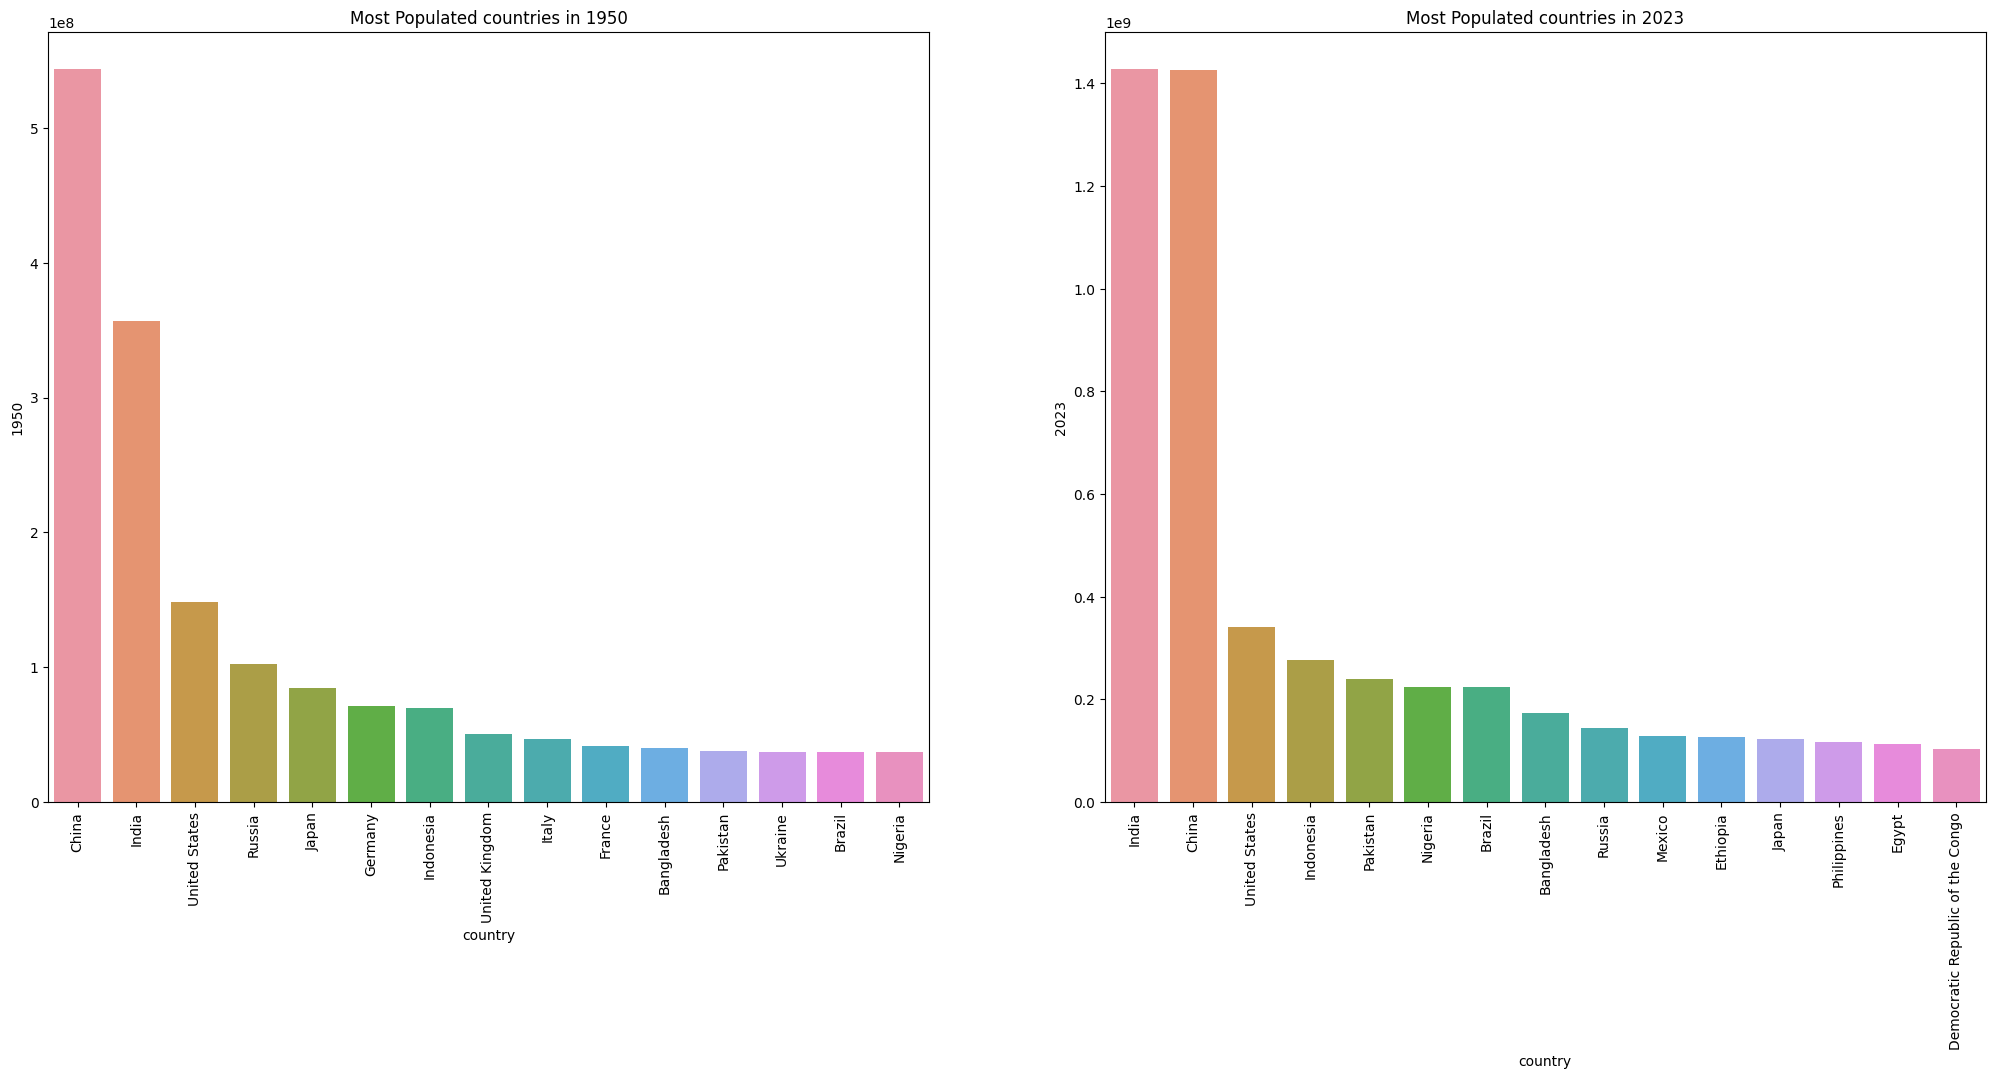

In [22]:
fig , axes= plt.subplots(nrows=1,ncols=2 ,figsize=(25,10))
sns.barplot(population_by_year.sort_values(by='1950',ascending=False).head(15),x='country',y='1950',ax=axes[0])
axes[0].set_title('Most Populated countries in 1950')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)
sns.barplot(population_by_year.sort_values(by='2023',ascending=False).head(15),x='country',y='2023',ax=axes[1])
axes[1].set_title('Most Populated countries in 2023')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90)
plt.show()

**The above two plots are comparision of population between the year 1950 and 2023** **and we can see china and india are top most populated countries since 1950**

In [23]:
population_by_year['change in % ']=((population_by_year['2023']-population_by_year['1950'])/population_by_year['1950'])*100
z=population_by_year.sort_values(by='change in % ',ascending=False).head(20)
px.bar(z,x='country',y='change in % ',text_auto='0.2s',title='% Change in Population from 1950 to 2023 ')

# **Fertility Rate Analysis**

In [24]:
countries_df.sample(2)

,country,region,land_area,fertility_rate,median_age
35,Canada,North America,9093510,1.5,41.0
130,Mauritius,Africa,2030,1.4,37.0


In [25]:
fig=px.bar(countries_df.sort_values(by='fertility_rate',ascending=False).head(20),x='country',y='fertility_rate',color='fertility_rate',title='Countries with highest Fertility rate')
fig.show()

In [26]:
Region_df

,region,fertility_rate,median_age,land_area
0,Africa,3.824138,21.137931,29648481
1,Asia,2.147059,30.823529,31033131
2,Europe,1.560870,42.173913,22134709
3,Latin America,1.834694,33.755102,20139431
4,North America,1.516667,40.666667,18651681
5,Oceania,2.626087,28.652174,8486460


In [27]:
fig=px.bar(Region_df,y='fertility_rate',x='region',color='fertility_rate',text_auto='0.2s',title='Fertility Rate Distribution by Region')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [28]:
y=pd.DataFrame()
for reg in region:
    temp_df=countries_df[countries_df['region']==reg].sort_values(by='fertility_rate',ascending=False).head(1)[['region','country','fertility_rate']]
    y=pd.concat([y,temp_df],ignore_index=True)
y

,region,country,fertility_rate
0,Asia,Afghanistan,4.4
1,Europe,Faroe Islands,2.7
2,Africa,Niger,6.7
3,Oceania,Solomon Islands,3.9
4,Latin America,French Guiana,3.4
5,North America,Greenland,1.9


In [29]:
fig = px.scatter(y,x='region',y='fertility_rate', color="country",size='fertility_rate',title='Maximum Fertility rate of country in each region in the World')
fig.show()

# **Median Age Analysis**

In [30]:
countries_df.sample(2)

,country,region,land_area,fertility_rate,median_age
16,Bangladesh,Asia,130170,1.9,27.0
162,Peru,Latin America,1280000,2.1,29.0


In [31]:
fig=px.bar(countries_df.sort_values(by='median_age',ascending=False),x='country',y='median_age',color='median_age',title='Median Age Distribustion over countries')
fig.show()

In [32]:
fig=px.bar(countries_df.sort_values(by='median_age',ascending=False).head(20),x='country',y='median_age',color='median_age',title='Countries with highest median age')
fig.show()

In [33]:
Region_df

,region,fertility_rate,median_age,land_area
0,Africa,3.824138,21.137931,29648481
1,Asia,2.147059,30.823529,31033131
2,Europe,1.560870,42.173913,22134709
3,Latin America,1.834694,33.755102,20139431
4,North America,1.516667,40.666667,18651681
5,Oceania,2.626087,28.652174,8486460


In [34]:
fig=px.bar(Region_df,y='median_age',x='region',color='median_age',text_auto='0.2s',title=' Median Age Distribution by Region ')
fig.show()

# **Other Analysis**

In [35]:
population_df.sample(2)

,country,population,yearly_change,net_change,density,land_area,net_migrants,fertility_rate,median_age,population_urban,world_share
112,Latvia,1830211,-1.10,-20440,29,62200,-7630,1.6,44.0,69.0,0.02
156,Oman,4644384,1.49,68086,15,309500,0,2.5,29.0,NaN,0.06


In [36]:
fig=px.bar(population_df.sort_values(by='density',ascending=False).head(15),x='density',y='country',color='density',title='Most Dense Countries')
fig.show()

In [37]:
fig=px.bar(population_df.sort_values(by='density',ascending=True).head(15),x='density',y='country',color='density',title='Least Dense Country')
fig.show()

In [38]:
fig=px.bar(population_df.sort_values(by='net_migrants',ascending=False).head(15),x='net_migrants',y='country',color='net_migrants',title='Net immigrates')
fig.show()

In [39]:
fig=px.bar(population_df.sort_values(by='world_share',ascending=False).head(15),x='world_share',y='country',color='world_share',title='world_share')
fig.show()

## **Regionwise Analysis** 

In [40]:
Region_df=countries_df.groupby(by='region').agg({'fertility_rate':'mean','median_age':'mean','land_area':'sum'}).reset_index()
Region_df

,region,fertility_rate,median_age,land_area
0,Africa,3.824138,21.137931,29648481
1,Asia,2.147059,30.823529,31033131
2,Europe,1.560870,42.173913,22134709
3,Latin America,1.834694,33.755102,20139431
4,North America,1.516667,40.666667,18651681
5,Oceania,2.626087,28.652174,8486460


In [41]:
fig=px.pie(Region_df,names='region',values='land_area',hole=0.2,title='Land Area Distribution by Region')
fig.update_traces(textinfo='label+percent')
fig.show()

In [42]:
fig=px.bar(Region_df,y='fertility_rate',x='region',color='fertility_rate',text_auto='0.2s',title='Fertility Rate Distribution by Region')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

The African COuntries have high fertitlity rate

In [43]:
fig=px.bar(Region_df,y='median_age',x='region',color='median_age',text_auto='0.2s',title=' median Age Distribution by Region ')
fig.show()

In [44]:
region=list(countries_df['region'].unique())
region

['Asia', 'Europe', 'Africa', 'Oceania', 'Latin America', 'North America']

In [45]:
x=pd.DataFrame()
for reg in region:
    temp_df=countries_df[countries_df['region']==reg].sort_values(by='land_area',ascending=False).head(1)[['region','country','land_area']]
    x=pd.concat([x,temp_df],ignore_index=True)
x

,region,country,land_area
0,Asia,China,9388211
1,Europe,Russia,16376870
2,Africa,Algeria,2381740
3,Oceania,Australia,7682300
4,Latin America,Brazil,8358140
5,North America,United States,9147420


In [46]:
fig = px.scatter(x,x='region',y='land_area', color="country",size='land_area',title='Maximum Land Area per Region in the World')
fig.show()

In [47]:
y=pd.DataFrame()
for reg in region:
    temp_df=countries_df[countries_df['region']==reg].sort_values(by='fertility_rate',ascending=False).head(1)[['region','country','fertility_rate']]
    y=pd.concat([y,temp_df],ignore_index=True)
y

,region,country,fertility_rate
0,Asia,Afghanistan,4.4
1,Europe,Faroe Islands,2.7
2,Africa,Niger,6.7
3,Oceania,Solomon Islands,3.9
4,Latin America,French Guiana,3.4
5,North America,Greenland,1.9


In [48]:
fig = px.scatter(y,x='region',y='fertility_rate', color="country",size='fertility_rate',title='Maximum Fertility Rate per Region in the World')
fig.show()

![](https://i.postimg.cc/J4VMLNC4/stock-vector-thank-you-handwritten-isolated-on-white-background-hand-drawn-lettering-style-one-line.jpg)